# **IT1244 Stock Market Prediction Project Code**
- Tutorial 06 Group 04:
Ng Simin (A0240646H), Woo Kean Jin Brandon (A0233835A), 
Muzi Chen (A0240456J), 
Jonas Lim (A0223850L), Tan Le Jun (A0199755E)


# Overview

1. Importing libraries
2. Data Preparation
  - 2.1. Non-Binary Data
  - 2.2. Binary Data
3. Prediction Models
  - 3.1. Neural Network (Non-Binary)
  - 3.2. Logistic Regression
  - 3.3. Stochastic Gradient Descent Classifier
  - 3.4. K Nearest Neighbor Classifier
4. Tuning Logistic Regression
  - 4.1. Solver ('liblinear', 'lbfgs', 'newton-cg')
  - 4.2. Proportion of train data and test data (80-20, 70-30, 90-10)

# 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras import optimizers

# 2. Data Preparation


**2.1. Non-binary Data**

In [3]:
data_nonbinary = read_csv('weekly_change_nonbinary.csv')
data_nonbinary = data_nonbinary.drop(columns= ["symbol", "week", "date", "Unnamed: 0"])
data_nonbinary.head()

,close_Monday,close_Tuesday,close_Wednesday,close_Thursday,close_Friday,max_Monday,max_Tuesday,max_Wednesday,max_Thursday,max_Friday,...,min_Tuesday,min_Wednesday,min_Thursday,min_Friday,open_Monday,open_Tuesday,open_Wednesday,open_Thursday,open_Friday,next_Fri
0,22.389128,22.145924,22.067240,22.038628,22.031473,22.625179,22.331903,22.174536,22.045780,22.067240,...,22.002861,22.002861,21.816881,21.745352,22.453505,22.324751,22.067240,22.017166,21.917025,21.766809
1,22.045780,21.781116,21.952789,22.281832,21.766809,22.210300,21.924177,22.017166,22.346209,22.432047,...,21.616594,21.494993,21.816881,21.695278,22.088697,21.859800,21.795422,21.881260,22.331903,20.865522
2,21.766809,22.031473,21.909870,21.831186,20.865522,22.432047,22.052933,21.938484,22.253220,21.709585,...,21.709585,21.595137,21.587982,20.808298,22.331903,21.716738,21.838341,22.174536,21.709585,20.050072
3,21.065807,20.951359,20.865522,20.522175,20.050072,21.208870,21.101574,20.951359,21.008583,20.865522,...,20.729614,20.550787,20.379112,19.971388,21.044350,21.008583,20.886980,20.836910,20.693848,20.865522
4,20.836910,21.101574,21.130186,20.793991,20.865522,20.972818,21.165951,21.380545,21.065807,20.929899,...,20.808298,21.001431,20.701000,20.157368,20.143063,20.901287,21.022890,20.958511,20.679543,21.444921


In [4]:
train_nonbinary, test_valid_nonbinary =  train_test_split(data_nonbinary, test_size=0.4)
test_nonbinary, valid_nonbinary = train_test_split(test_valid_nonbinary, test_size=0.5)

trainx_nonbinary, nnTrainy_nonbinary = train_nonbinary.copy().drop(columns = "next_Fri"), train_nonbinary["next_Fri"]
testx_nonbinary, nnTesty_nonbinary = test_nonbinary.copy().drop(columns = "next_Fri"), test_nonbinary["next_Fri"]
validx_nonbinary, nnValidy_nonbinary = valid_nonbinary.copy().drop(columns = "next_Fri"), valid_nonbinary["next_Fri"]

true_friday_price_comparison_nonbinary = test_nonbinary[["close_Friday", "next_Fri"]]

data = load_iris()
scale= StandardScaler()

nnTrainx_nonbinary = scale.fit_transform(trainx_nonbinary)
nnTestx_nonbinary = scale.fit_transform(testx_nonbinary)
nnValidx_nonbinary = scale.fit_transform(validx_nonbinary)

**2.2. Binary Data**

In [5]:
# Importing data
data = read_csv('weekly_change_tgt.csv')
data = data.drop(columns= ["Unnamed: 0", "date", "symbol", "week"])
data.head()

,close_Monday,close_Tuesday,close_Wednesday,close_Thursday,close_Friday,max_Monday,max_Tuesday,max_Wednesday,max_Thursday,max_Friday,...,min_Wednesday,min_Thursday,min_Friday,open_Monday,open_Tuesday,open_Wednesday,open_Thursday,open_Friday,next_Fri,y
0,22.389128,22.145924,22.067240,22.038628,22.031473,22.625179,22.331903,22.174536,22.045780,22.067240,...,22.002861,21.816881,21.745352,22.453505,22.324751,22.067240,22.017166,21.917025,21.766809,0
1,22.045780,21.781116,21.952789,22.281832,21.766809,22.210300,21.924177,22.017166,22.346209,22.432047,...,21.494993,21.816881,21.695278,22.088697,21.859800,21.795422,21.881260,22.331903,20.865522,0
2,21.766809,22.031473,21.909870,21.831186,20.865522,22.432047,22.052933,21.938484,22.253220,21.709585,...,21.595137,21.587982,20.808298,22.331903,21.716738,21.838341,22.174536,21.709585,20.050072,0
3,21.065807,20.951359,20.865522,20.522175,20.050072,21.208870,21.101574,20.951359,21.008583,20.865522,...,20.550787,20.379112,19.971388,21.044350,21.008583,20.886980,20.836910,20.693848,20.865522,1
4,20.836910,21.101574,21.130186,20.793991,20.865522,20.972818,21.165951,21.380545,21.065807,20.929899,...,21.001431,20.701000,20.157368,20.143063,20.901287,21.022890,20.958511,20.679543,21.444921,1


In [6]:
# Splitting the train and test dataset

## fulltrain and fulltest contains next_Fri closing price which will not be used to train the model
fulltrain, fulltest = train_test_split(data, test_size=0.2, random_state = 42)
trainx, trainy = fulltrain.copy().drop(columns = (["next_Fri","y"])), fulltrain["y"]
testx, testy = fulltest.copy().drop(columns = (["next_Fri","y"])), fulltest["y"]
true_friday_price_comparison = fulltest[["close_Friday", "next_Fri"]]

# Standardizing the x data
sctrainx = scale.fit_transform(trainx)
sctestx = scale.fit_transform(testx)

# Duplicate data for Logisitic Regression, Stochastic Gradient Descent Classifier and K Nearest Neighbour Classifier
logsTrainx, logsTrainy, logsTestx, logsTesty = sctrainx.copy(), trainy.copy(), sctestx.copy(), testy.copy()
sgdTrainx, sgdTrainy, sgdTestx, sgdTesty = sctrainx.copy(), trainy.copy(), sctestx.copy(), testy.copy()
knnTrainx, knnTrainy, knnTestx, knnTesty = sctrainx.copy(), trainy.copy(), sctestx.copy(), testy.copy()

In [7]:
# Preparation of data for binary neural network with valid data
nnTrain_binary, nn_test_valid_binary =  fulltrain.copy(), fulltest.copy()
nnTest_binary, nnValid_binary = train_test_split(nn_test_valid_binary, test_size=0.5)

nnTrainx_binary, nnTrainy_binary = nnTrain_binary.copy().drop(columns = (["next_Fri","y"])), nnTrain_binary["y"]
nnTestx_binary, nnTesty_binary = nnTest_binary.copy().drop(columns = (["next_Fri","y"])), nnTest_binary["y"]
nnValidx_binary, nnValidy_binary = nnValid_binary.copy().drop(columns = (["next_Fri","y"])), nnValid_binary["y"]

# Standardizing the x data
nnTrainx_binary = scale.fit_transform(nnTrainx_binary)
nnTestx_binary = scale.fit_transform(nnTestx_binary)
nnValidx_binary = scale.fit_transform(nnValidx_binary)

# 3. Prediction Models

**3.1. Neural Network (Non-binary)**

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

nn_model_nonbinary = Sequential([layers.Input((20, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

nn_model_nonbinary.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

nn_model_nonbinary.fit(nnTrainx_nonbinary, nnTrainy_nonbinary, validation_data=(nnValidx_nonbinary, nnValidy_nonbinary), epochs=10)

Epoch 1/10
3824/3824 [==============================] - 64s 15ms/step - loss: 2619.2834 - mean_absolute_error: 10.3960 - val_loss: 111.5657 - val_mean_absolute_error: 4.4541
Epoch 2/10
3824/3824 [==============================] - 42s 11ms/step - loss: 85.7782 - mean_absolute_error: 3.8971 - val_loss: 154.9315 - val_mean_absolute_error: 4.7034
Epoch 3/10
3824/3824 [==============================] - 44s 12ms/step - loss: 76.0893 - mean_absolute_error: 3.7611 - val_loss: 101.7136 - val_mean_absolute_error: 5.5914
Epoch 4/10
3824/3824 [==============================] - 43s 11ms/step - loss: 73.4897 - mean_absolute_error: 3.6536 - val_loss: 135.1807 - val_mean_absolute_error: 5.0433
Epoch 5/10
3824/3824 [==============================] - 45s 12ms/step - loss: 72.3809 - mean_absolute_error: 3.5774 - val_loss: 125.2385 - val_mean_absolute_error: 5.2065
Epoch 6/10
3824/3824 [==============================] - 43s 11ms/step - loss: 70.9136 - mean_absolute_error: 3.4735 - val_loss: 91.3460 - val_

1275/1275 [==============================] - 6s 4ms/step
Final true capital:  58247.49565568122
Final predicted capital:  9479.365431214


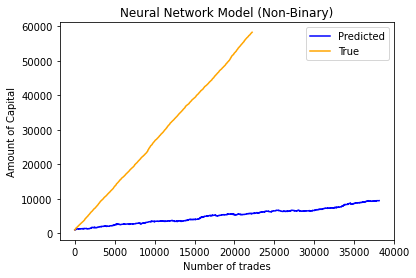

In [9]:
# Simulation of giving bot $1000 with neural network model
money1 = 1000
money2 = 1000
predicted_capital = [money1]
true_capital = [money2]
nn_predicted_nonbinary = np.array(nn_model_nonbinary.predict(nnTestx_nonbinary).flatten())
x = np.array(true_friday_price_comparison_nonbinary)

for n in range(len(x)-1):
  # Check if model predict price to increase
  if nn_predicted_nonbinary[n] > x[n,0]:
    buy_price1 = x[n,0] 
    sell_price1 = x[n,1]

    profit1 = sell_price1 - buy_price1
    money1 += profit1
    predicted_capital.append(money1)
    
  if x[n,1] > x[n,0]:
    buy_price2 = x[n,0] 
    sell_price2 = x[n,1]
  
    profit2 = sell_price2 - buy_price2
    money2 += profit2
    true_capital.append(money2)

plt.plot(list(range(len(predicted_capital))),predicted_capital, color = "blue", label = "Predicted")
plt.plot(list(range(len(true_capital))),true_capital, color = "orange", label = "True")
plt.xlabel('Number of trades')
plt.ylabel('Amount of Capital')
plt.title("Neural Network Model (Non-Binary)")
plt.legend()

print("Final true capital: ", true_capital[-1])
print("Final predicted capital: ", predicted_capital[-1])


**3.2. Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression

logistics_regression = LogisticRegression(solver='liblinear')
logistics_regression.fit(logsTrainx, logsTrainy)
print("Logistic Regression: {}%".format(logistics_regression.score(logsTestx, logsTesty)*100))

Logistic Regression: 54.12999239953907%


Final true capital:  58201.21596009092
Final predicted capital:  10546.362652134945


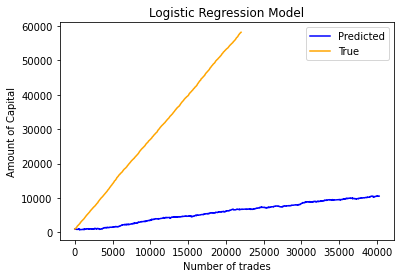

In [11]:
# Simulation of giving bot $1000 with log regression model
money1 = 1000
money2 = 1000
predicted_capital = [money1]
true_capital = [money2]
true = np.array(logsTesty)
logs_predicted = np.array(logistics_regression.predict(logsTestx))
x = np.array(true_friday_price_comparison)

for n in range(len(logs_predicted)-1):
  # Check if model predict price to increase
  if logs_predicted[n] == 1:
    buy_price1 = x[n,0] 
    sell_price1 = x[n,1]

    profit1 = sell_price1 - buy_price1
    money1 += profit1
    predicted_capital.append(money1)
    
  if true[n]:
    buy_price2 = x[n,0] 
    sell_price2 = x[n,1]
  
    profit2 = sell_price2 - buy_price2
    money2 += profit2
    true_capital.append(money2)

plt.plot(list(range(len(predicted_capital))),predicted_capital, color = "blue", label = "Predicted")
plt.plot(list(range(len(true_capital))),true_capital, color = "orange", label = "True")
plt.xlabel('Number of trades')
plt.ylabel('Amount of Capital')
plt.title("Logistic Regression Model")
plt.legend()

print("Final true capital: ", true_capital[-1])
print("Final predicted capital: ", predicted_capital[-1])

**3.3. Stochastic Gradient Descent Classifier**

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(max_iter=1000, tol=0.01)
sgd_classifier.fit(sgdTrainx, sgdTrainy)
print("Stochastic Gradient Descent Classifier: {}%".format(sgd_classifier.score(sgdTestx, sgdTesty)*100))

Stochastic Gradient Descent Classifier: 53.97798318091549%


Final true capital:  58201.21596009092
Final predicted capital:  9083.196253494969


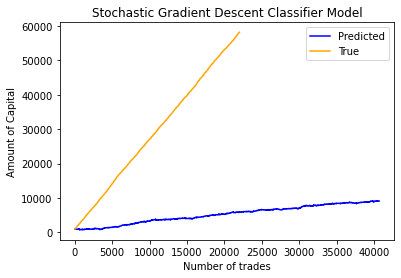

In [13]:
# Simulation of giving bot $1000 with sgd classifier model
money1 = 1000
money2 = 1000
predicted_capital = [money1]
true_capital = [money2]
true = np.array(sgdTesty)
sgd_predicted = np.array(sgd_classifier.predict(sgdTestx))
x = np.array(true_friday_price_comparison)

for n in range(len(sgd_predicted)-1):
  # Check if model predict price to increase
  if sgd_predicted[n] == 1:
    buy_price1 = x[n,0] 
    sell_price1 = x[n,1]

    profit1 = sell_price1 - buy_price1
    money1 += profit1
    predicted_capital.append(money1)
    
  if true[n]:
    buy_price2 = x[n,0] 
    sell_price2 = x[n,1]
  
    profit2 = sell_price2 - buy_price2
    money2 += profit2
    true_capital.append(money2)

plt.plot(list(range(len(predicted_capital))),predicted_capital, color = "blue", label = "Predicted")
plt.plot(list(range(len(true_capital))),true_capital, color = "orange", label = "True")
plt.xlabel('Number of trades')
plt.ylabel('Amount of Capital')
plt.title("Stochastic Gradient Descent Classifier Model")
plt.legend()

print("Final true capital: ", true_capital[-1])
print("Final predicted capital: ", predicted_capital[-1])

 **3.4. K Nearest Neighbor Classifier**

In [14]:
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = int(sqrt(len(knnTrainx))))
knn_classifier.fit(knnTrainx, knnTrainy)
print("K Nearest Neighbor Classifier: {}%".format(knn_classifier.score(knnTestx, knnTesty)*100))

K Nearest Neighbor Classifier: 53.882364478878074%


Final true capital:  58201.21596009092
Final predicted capital:  9217.35105349498


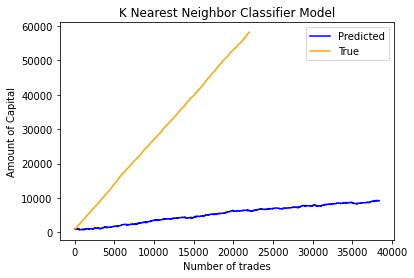

In [15]:
# Simulation of giving bot $1000 with knn classifier model
money1 = 1000
money2 = 1000
predicted_capital = [money1]
true_capital = [money2]
true = np.array(knnTesty)
knn_predicted = np.array(knn_classifier.predict(knnTestx))
x = np.array(true_friday_price_comparison)

for n in range(len(sgd_predicted)-1):
  # Check if model predict price to increase
  if knn_predicted[n] == 1:
    buy_price1 = x[n,0] 
    sell_price1 = x[n,1]

    profit1 = sell_price1 - buy_price1
    money1 += profit1
    predicted_capital.append(money1)
    
  if true[n]:
    buy_price2 = x[n,0] 
    sell_price2 = x[n,1]
  
    profit2 = sell_price2 - buy_price2
    money2 += profit2
    true_capital.append(money2)

plt.plot(list(range(len(predicted_capital))),predicted_capital, color = "blue", label = "Predicted")
plt.plot(list(range(len(true_capital))),true_capital, color = "orange", label = "True")
plt.xlabel('Number of trades')
plt.ylabel('Amount of Capital')
plt.title("K Nearest Neighbor Classifier Model")
plt.legend()

print("Final true capital: ", true_capital[-1])
print("Final predicted capital: ", predicted_capital[-1])

# **4. Tuning Parameters**

**4.1. Solver**

4.1.1. Solver: "liblinear" (Default)

Logistic Regression Accuracy: 54.12999239953907%
Final true capital:  58201.21596009092
Final predicted capital:  10546.362652134945


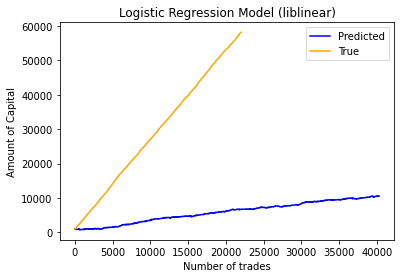

In [16]:
logistics_regression1 = LogisticRegression(solver='liblinear')
logistics_regression1.fit(logsTrainx, logsTrainy)
print("Logistic Regression Accuracy: {}%".format(logistics_regression1.score(logsTestx, logsTesty)*100))

# Simulation of giving bot $1000 with log regression model
money1 = 1000
money2 = 1000
predicted_capital = [money1]
true_capital = [money2]
true = np.array(logsTesty)
logs_predicted = np.array(logistics_regression1.predict(logsTestx))
x = np.array(true_friday_price_comparison)

for n in range(len(logs_predicted)-1):
  # Check if moodel predict price to increase
  if logs_predicted[n] == 1:
    buy_price1 = x[n,0] 
    sell_price1 = x[n,1]

    profit1 = sell_price1 - buy_price1
    money1 += profit1
    predicted_capital.append(money1)
    
  if true[n]:
    buy_price2 = x[n,0] 
    sell_price2 = x[n,1]
  
    profit2 = sell_price2 - buy_price2
    money2 += profit2
    true_capital.append(money2)

plt.plot(list(range(len(predicted_capital))),predicted_capital, color = "blue", label = "Predicted")
plt.plot(list(range(len(true_capital))),true_capital, color = "orange", label = "True")
plt.xlabel('Number of trades')
plt.ylabel('Amount of Capital')
plt.title("Logistic Regression Model (liblinear)")
plt.legend()

print("Final true capital: ", true_capital[-1])
print("Final predicted capital: ", predicted_capital[-1])

4.1.2. Solver: "lbfgs"

Logistic Regression Accuracy: 54.13979944590188%
Final true capital:  58201.21596009092
Final predicted capital:  10591.342611004935


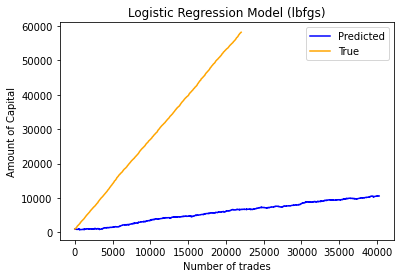

In [17]:
logistics_regression2 = LogisticRegression(solver='lbfgs')
logistics_regression2.fit(logsTrainx, logsTrainy)
print("Logistic Regression Accuracy: {}%".format(logistics_regression2.score(logsTestx, logsTesty)*100))

# Simulation of giving bot $1000 with log regression model
money1 = 1000
money2 = 1000
predicted_capital = [money1]
true_capital = [money2]
true = np.array(logsTesty)
logs_predicted = np.array(logistics_regression2.predict(logsTestx))
x = np.array(true_friday_price_comparison)

for n in range(len(logs_predicted)-1):
  # Check if model predict price to increase
  if logs_predicted[n] == 1:
    buy_price1 = x[n,0] 
    sell_price1 = x[n,1]

    profit1 = sell_price1 - buy_price1
    money1 += profit1
    predicted_capital.append(money1)
    
  if true[n]:
    buy_price2 = x[n,0] 
    sell_price2 = x[n,1]
  
    profit2 = sell_price2 - buy_price2
    money2 += profit2
    true_capital.append(money2)

plt.plot(list(range(len(predicted_capital))),predicted_capital, color = "blue", label = "Predicted")
plt.plot(list(range(len(true_capital))),true_capital, color = "orange", label = "True")
plt.xlabel('Number of trades')
plt.ylabel('Amount of Capital')
plt.title("Logistic Regression Model (lbfgs)")
plt.legend()

print("Final true capital: ", true_capital[-1])
print("Final predicted capital: ", predicted_capital[-1])

**4.1.3. Solver: "newton-cg"**

Logistic Regression Accuracy: 54.12999239953907%
Final true capital:  58201.21596009092
Final predicted capital:  10546.362652134945


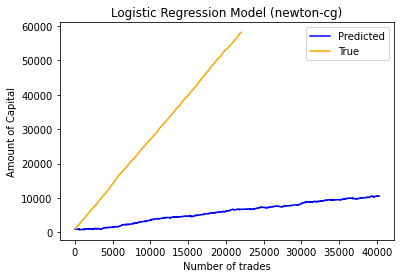

In [18]:
logistics_regression3 = None
logistics_regression3 = LogisticRegression(solver='newton-cg')
logistics_regression3.fit(logsTrainx, logsTrainy)
print("Logistic Regression Accuracy: {}%".format(logistics_regression3.score(logsTestx, logsTesty)*100))

# Simulation of giving bot $1000 with log regression model
money1 = 1000
money2 = 1000
predicted_capital = [money1]
true_capital = [money2]
true = np.array(logsTesty)
logs_predicted = np.array(logistics_regression3.predict(logsTestx))
x = np.array(true_friday_price_comparison)

for n in range(len(logs_predicted)-1):
  # Check if model predict price to increase
  if logs_predicted[n] == 1:
    buy_price1 = x[n,0] 
    sell_price1 = x[n,1]

    profit1 = sell_price1 - buy_price1
    money1 += profit1
    predicted_capital.append(money1)
    
  if true[n]:
    buy_price2 = x[n,0] 
    sell_price2 = x[n,1]
  
    profit2 = sell_price2 - buy_price2
    money2 += profit2
    true_capital.append(money2)

plt.plot(list(range(len(predicted_capital))),predicted_capital, color = "blue", label = "Predicted")
plt.plot(list(range(len(true_capital))),true_capital, color = "orange", label = "True")
plt.xlabel('Number of trades')
plt.ylabel('Amount of Capital')
plt.title("Logistic Regression Model (newton-cg)")
plt.legend()

print("Final true capital: ", true_capital[-1])
print("Final predicted capital: ", predicted_capital[-1])

**4.2. Proportion of train to test data**

4.2.1. 80% Train, 20% Test (Default)

Logistic Regression Accuracy: 54.13979944590188%
Final true capital:  58201.21596009092
Final predicted capital:  10591.342611004935


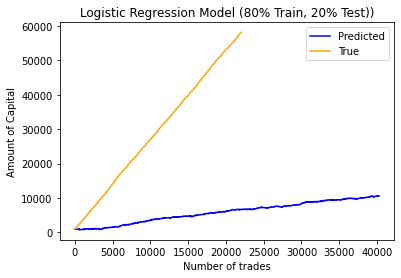

In [19]:
## fulltrain and fulltest contains next_Fri closing price which will not be used to train the model
fulltrain1, fulltest1 = train_test_split(data, test_size=0.2, random_state = 42)
trainx, trainy = fulltrain1.copy().drop(columns = (["next_Fri","y"])), fulltrain1["y"]
testx, testy = fulltest1.copy().drop(columns = (["next_Fri","y"])), fulltest1["y"]
true_friday_price_comparison = fulltest1[["close_Friday", "next_Fri"]]

# Standardizing the x data
sctrainx = scale.fit_transform(trainx)
sctestx = scale.fit_transform(testx)

logistics_regression4 = None
logistics_regression4 = LogisticRegression(solver='lbfgs')
logistics_regression4.fit(sctrainx, trainy)
print("Logistic Regression Accuracy: {}%".format(logistics_regression4.score(sctestx, testy)*100))

# Simulation of giving bot $1000 with log regression model
money1 = 1000
money2 = 1000
predicted_capital = [money1]
true_capital = [money2]
true = np.array(testy)
logs_predicted = np.array(logistics_regression4.predict(sctestx))
x = np.array(true_friday_price_comparison)

for n in range(len(logs_predicted)-1):
  # Check if model predict price to increase
  if logs_predicted[n] == 1:
    buy_price1 = x[n,0] 
    sell_price1 = x[n,1]

    profit1 = sell_price1 - buy_price1
    money1 += profit1
    predicted_capital.append(money1)
    
  if true[n]:
    buy_price2 = x[n,0] 
    sell_price2 = x[n,1]
  
    profit2 = sell_price2 - buy_price2
    money2 += profit2
    true_capital.append(money2)

plt.plot(list(range(len(predicted_capital))),predicted_capital, color = "blue", label = "Predicted")
plt.plot(list(range(len(true_capital))),true_capital, color = "orange", label = "True")
plt.xlabel('Number of trades')
plt.ylabel('Amount of Capital')
plt.title("Logistic Regression Model (80% Train, 20% Test))")
plt.legend()

print("Final true capital: ", true_capital[-1])
print("Final predicted capital: ", predicted_capital[-1])

4.2.2. 70% Train, 30% Test

Logistic Regression Accuracy: 54.13533834586466%
Final true capital:  88280.07657955487
Final predicted capital:  15801.941983536088


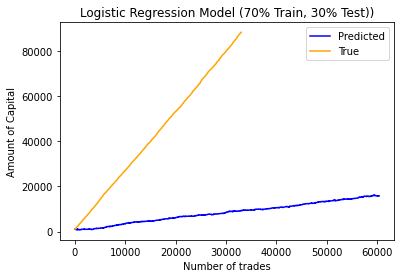

In [20]:
## fulltrain and fulltest contains next_Fri closing price which will not be used to train the model
fulltrain2, fulltest2 = train_test_split(data, test_size=0.3, random_state = 42)
trainx, trainy = fulltrain2.copy().drop(columns = (["next_Fri","y"])), fulltrain2["y"]
testx, testy = fulltest2.copy().drop(columns = (["next_Fri","y"])), fulltest2["y"]
true_friday_price_comparison = fulltest2[["close_Friday", "next_Fri"]]

# Standardizing the x data
sctrainx = scale.fit_transform(trainx)
sctestx = scale.fit_transform(testx)

logistics_regression4 = None
logistics_regression4 = LogisticRegression(solver='lbfgs')
logistics_regression4.fit(sctrainx, trainy)
print("Logistic Regression Accuracy: {}%".format(logistics_regression4.score(sctestx, testy)*100))

# Simulation of giving bot $1000 with log regression model
money1 = 1000
money2 = 1000
predicted_capital = [money1]
true_capital = [money2]
true = np.array(testy)
logs_predicted = np.array(logistics_regression4.predict(sctestx))
x = np.array(true_friday_price_comparison)

for n in range(len(logs_predicted)-1):
  # Check if model predict price to increase
  if logs_predicted[n] == 1:
    buy_price1 = x[n,0] 
    sell_price1 = x[n,1]

    profit1 = sell_price1 - buy_price1
    money1 += profit1
    predicted_capital.append(money1)
    
  if true[n]:
    buy_price2 = x[n,0] 
    sell_price2 = x[n,1]
  
    profit2 = sell_price2 - buy_price2
    money2 += profit2
    true_capital.append(money2)

plt.plot(list(range(len(predicted_capital))),predicted_capital, color = "blue", label = "Predicted")
plt.plot(list(range(len(true_capital))),true_capital, color = "orange", label = "True")
plt.xlabel('Number of trades')
plt.ylabel('Amount of Capital')
plt.title("Logistic Regression Model (70% Train, 30% Test))")
plt.legend()

print("Final true capital: ", true_capital[-1])
print("Final predicted capital: ", predicted_capital[-1])

4.2.3. 90% Train, 10% Test

Logistic Regression Accuracy: 54.38364224771992%
Final true capital:  29862.44648345797
Final predicted capital:  6247.922539365984


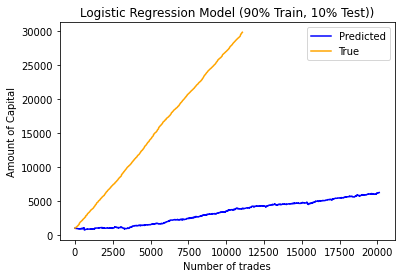

In [21]:
## fulltrain and fulltest contains next_Fri closing price which will not be used to train the model
fulltrain3, fulltest3 = train_test_split(data, test_size=0.1, random_state = 42)
trainx, trainy = fulltrain3.copy().drop(columns = (["next_Fri","y"])), fulltrain3["y"]
testx, testy = fulltest3.copy().drop(columns = (["next_Fri","y"])), fulltest3["y"]
true_friday_price_comparison = fulltest3[["close_Friday", "next_Fri"]]

# Standardizing the x data
sctrainx = scale.fit_transform(trainx)
sctestx = scale.fit_transform(testx)

logistics_regression4 = None
logistics_regression4 = LogisticRegression(solver='lbfgs', max_iter=1000)
logistics_regression4.fit(sctrainx, trainy)
print("Logistic Regression Accuracy: {}%".format(logistics_regression4.score(sctestx, testy)*100))

# Simulation of giving bot $1000 with log regression model
money1 = 1000
money2 = 1000
predicted_capital = [money1]
true_capital = [money2]
true = np.array(testy)
logs_predicted = np.array(logistics_regression4.predict(sctestx))
x = np.array(true_friday_price_comparison)

for n in range(len(logs_predicted)-1):
  # Check if model predict price to increase
  if logs_predicted[n] == 1:
    buy_price1 = x[n,0] 
    sell_price1 = x[n,1]

    profit1 = sell_price1 - buy_price1
    money1 += profit1
    predicted_capital.append(money1)
    
  if true[n]:
    buy_price2 = x[n,0] 
    sell_price2 = x[n,1]
  
    profit2 = sell_price2 - buy_price2
    money2 += profit2
    true_capital.append(money2)

plt.plot(list(range(len(predicted_capital))),predicted_capital, color = "blue", label = "Predicted")
plt.plot(list(range(len(true_capital))),true_capital, color = "orange", label = "True")
plt.xlabel('Number of trades')
plt.ylabel('Amount of Capital')
plt.title("Logistic Regression Model (90% Train, 10% Test))")
plt.legend()

print("Final true capital: ", true_capital[-1])
print("Final predicted capital: ", predicted_capital[-1])

# **END OF CODE**